In [2]:
import scSherlock as sh
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

# Marker detection with sCherlock

Here we will use a published scRNAseq atlas of the normal human breast
https://www.nature.com/articles/s41588-024-01688-9

The integrated dataset can be downloaded as a h5ad file from https://cellxgene.cziscience.com/collections/48259aa8-f168-4bf5-b797-af8e88da6637 

In [3]:
# Load the data
adata = sc.read_h5ad("/home/croizer/Downloads/HBCA_reed_2024.h5ad")
cell_type_column = "author_cell_type"
patient_column = "donor_id"

This atlas covers 58 cell types with 714 331 cells 

In [8]:
adata.obs['author_cell_type']

r1_hbca_c01_AACCATGGTATGCTTG               LummHR-SCGB
r1_hbca_c01_ACGGAGACAAGCTGTT              LummHR-major
r1_hbca_c01_ACTGATGGTCATCGGC              LummHR-major
r1_hbca_c01_AGGTCATGTGCACCAC               LummHR-SCGB
r1_hbca_c01_CAGCCGAAGATATGCA              LummHR-major
                                              ...     
hbca_c150_hbca_c150_TTTATGCCACAATGTC-1       pericytes
hbca_c150_hbca_c150_TTTCCTCAGGTATTGA-1            vsmc
hbca_c150_hbca_c150_TTTGATCGTGTTACAC-1       pericytes
hbca_c150_hbca_c150_TTTGATCTCGAGAGAC-1            vsmc
hbca_c150_hbca_c150_TTTGGAGCATTCATCT-1            vsmc
Name: author_cell_type, Length: 714331, dtype: category
Categories (58, object): ['CD4-Tem', 'CD4-Th', 'CD4-Th-like', 'CD4-Treg', ..., 'pericytes', 'plasma_IgA', 'plasma_IgG', 'vsmc']

In [9]:
# Default features are ENSEMBL_ID, changing to gene names for interpretability
adata.var_names = adata.var['feature_name'].values

Here we create the sCherlock object after setting the ScSherlockConfig

In [ ]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25], # scaling factor to evaluate
    scoring_method=sh.ScoringMethod.DIFF, # scoring method to use
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100, # Maximum number of marker to keep
    min_patients=3, # Minimum number of patients per gene
    min_reads=10, # Minimum number of reads per gene
    sparse_step=5, # Number of cutoff to evaluate for gene preselection
    n_jobs=-1 # Use all available cores
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata, # AnnData object
    column_patient=patient_column,  # Column name for patient IDs
    config=config # Configuration object
)

2025-04-28 10:16:29,584 - ScSherlock - INFO - ScSherlock initialized with (714331, 33145) data matrix


We can now run sCherlock on a given annotation column to identify specific marker genes

In [ ]:
top_markers = scherlock.run(column_ctype="author_cell_type", method='empiric', bootstrap=False)

2025-04-28 10:16:42,865 - ScSherlock - INFO - Calculating theoretical scores for author_cell_type...
Aggregating Samples: 100%|██████████| 7308/7308 [00:02<00:00, 2605.88it/s]
2025-04-28 10:17:46,586 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-28 10:17:46,587 - ScSherlock - INFO - Applying multi-category correction...
2025-04-28 10:17:46,752 - ScSherlock - INFO - Aggregating scores...
2025-04-28 10:17:46,902 - ScSherlock - INFO - Sorting scores...
2025-04-28 10:17:47,574 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 58/58 [00:03<00:00, 17.55it/s]
2025-04-28 10:17:58,196 - ScSherlock - INFO - Calculating empirical scores...
2025-04-28 10:20:43,841 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-28 10:20:44,579 - ScSherlock - INFO - Sorting empirical scores...
2025-04-28 10:20:45,427 - ScSherlock - INFO - Identifying top markers...
2025-04-28 10:20:45,431 - ScSherlock - INFO - ScSherlock completed. Found markers for

{'LummHR-SCGB': 'SERPINA6',
 'LummHR-major': 'KIAA1210',
 'LummHR-active': 'UGT2B15',
 'Lumsec-basal': 'CDH19',
 'Lumsec-major': 'ENSG00000248362.1',
 'Lumsec-HLA': 'TF',
 'Lumsec-KIT': 'PPM1J-DT',
 'basal': 'SMYD1',
 'b_naive': 'TCL1A',
 'plasma_IgG': 'IGHGP',
 'plasma_IgA': 'ENAM',
 'CD4-Treg': 'FOXP3',
 'NK': 'KIR2DL1',
 'Macro-lipo': 'CHIT1',
 'mDC': 'TNNT2',
 'Mono-non-classical': 'LYPD2',
 'cDC1': 'PPY',
 'Neutrophil': 'CYP4F3',
 'Fibro-prematrix': 'KRTAP13-4',
 'Fibro-major': 'ADH4',
 'Fibro-matrix': 'PTPRN',
 'Fibro-SFRP4': 'TRDN',
 'Lymph-major': 'UNC5A',
 'Vas-capillary': 'GALR1',
 'Vas-venous': 'CADM3-AS1',
 'Vas-arterial': 'ENSG00000233760.3',
 'pericytes': 'CFHR1',
 'vsmc': 'RERGL',
 'Mast': 'CMA1'}

## Basic plotting 

2025-04-28 10:21:27,687 - ScSherlock - INFO - Plotting 52 genes for 58 cell types using empiric model


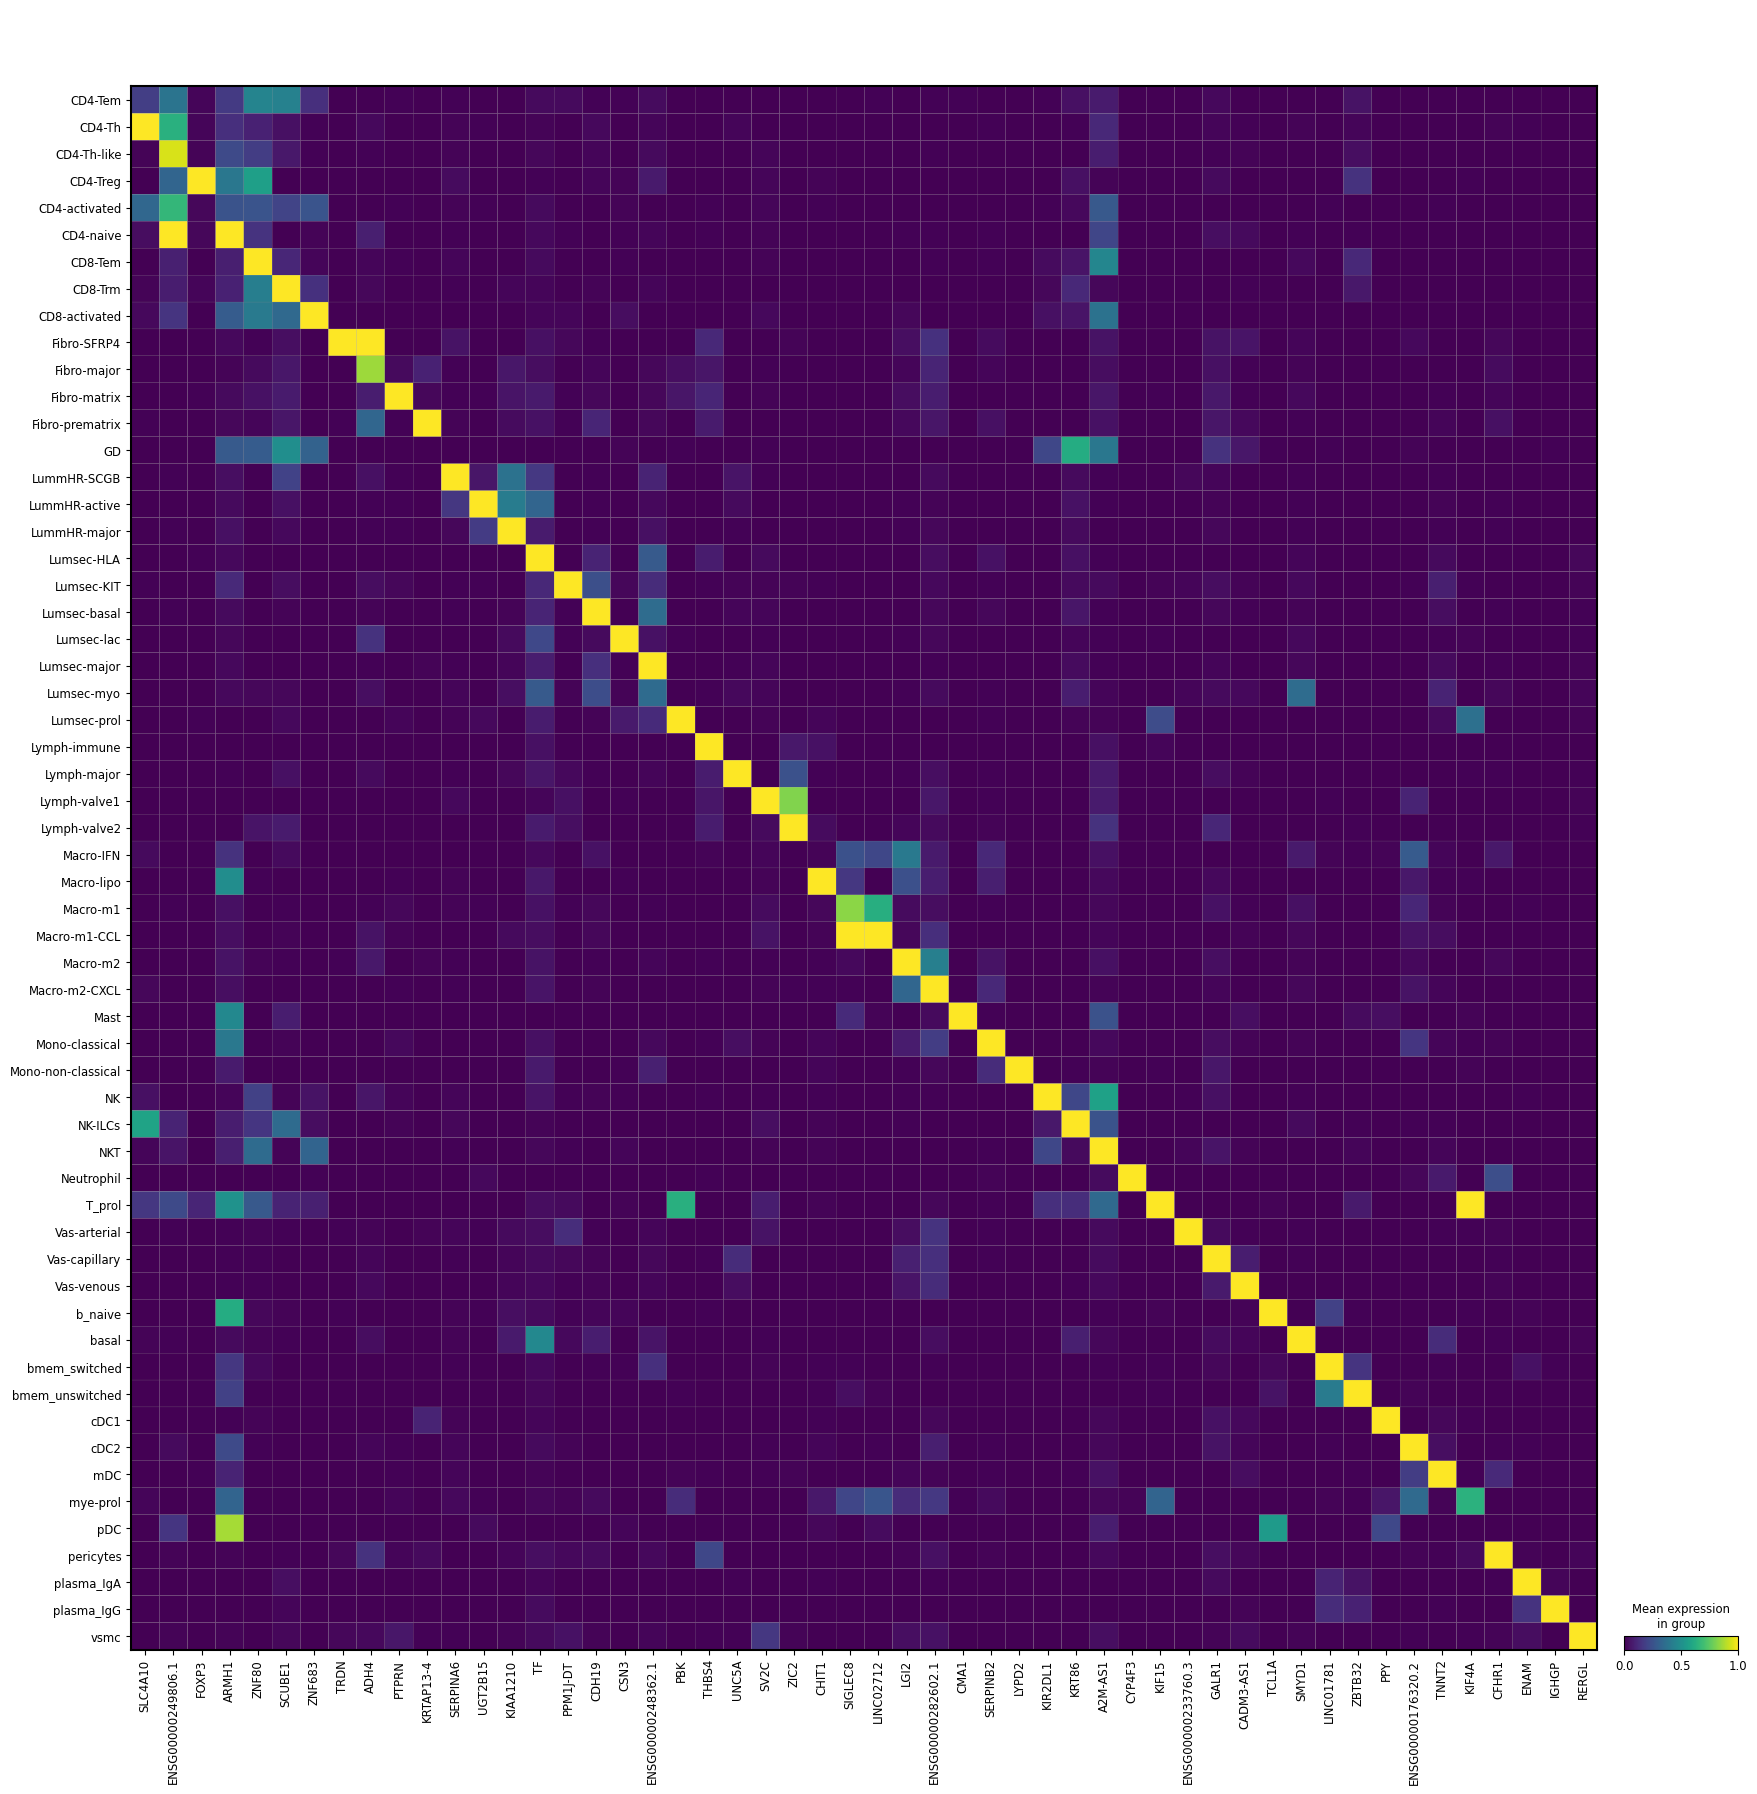

In [ ]:
# Show top marker for each cell type, without selecting on a cutoff value
scherlock.plot_marker_heatmap(n_genes=1, column_ctype=cell_type_column, cutoff=0,remove_ctype_no_marker=False)

2025-04-28 10:22:34,365 - ScSherlock - INFO - Plotting 129 genes for 48 cell types using empiric model


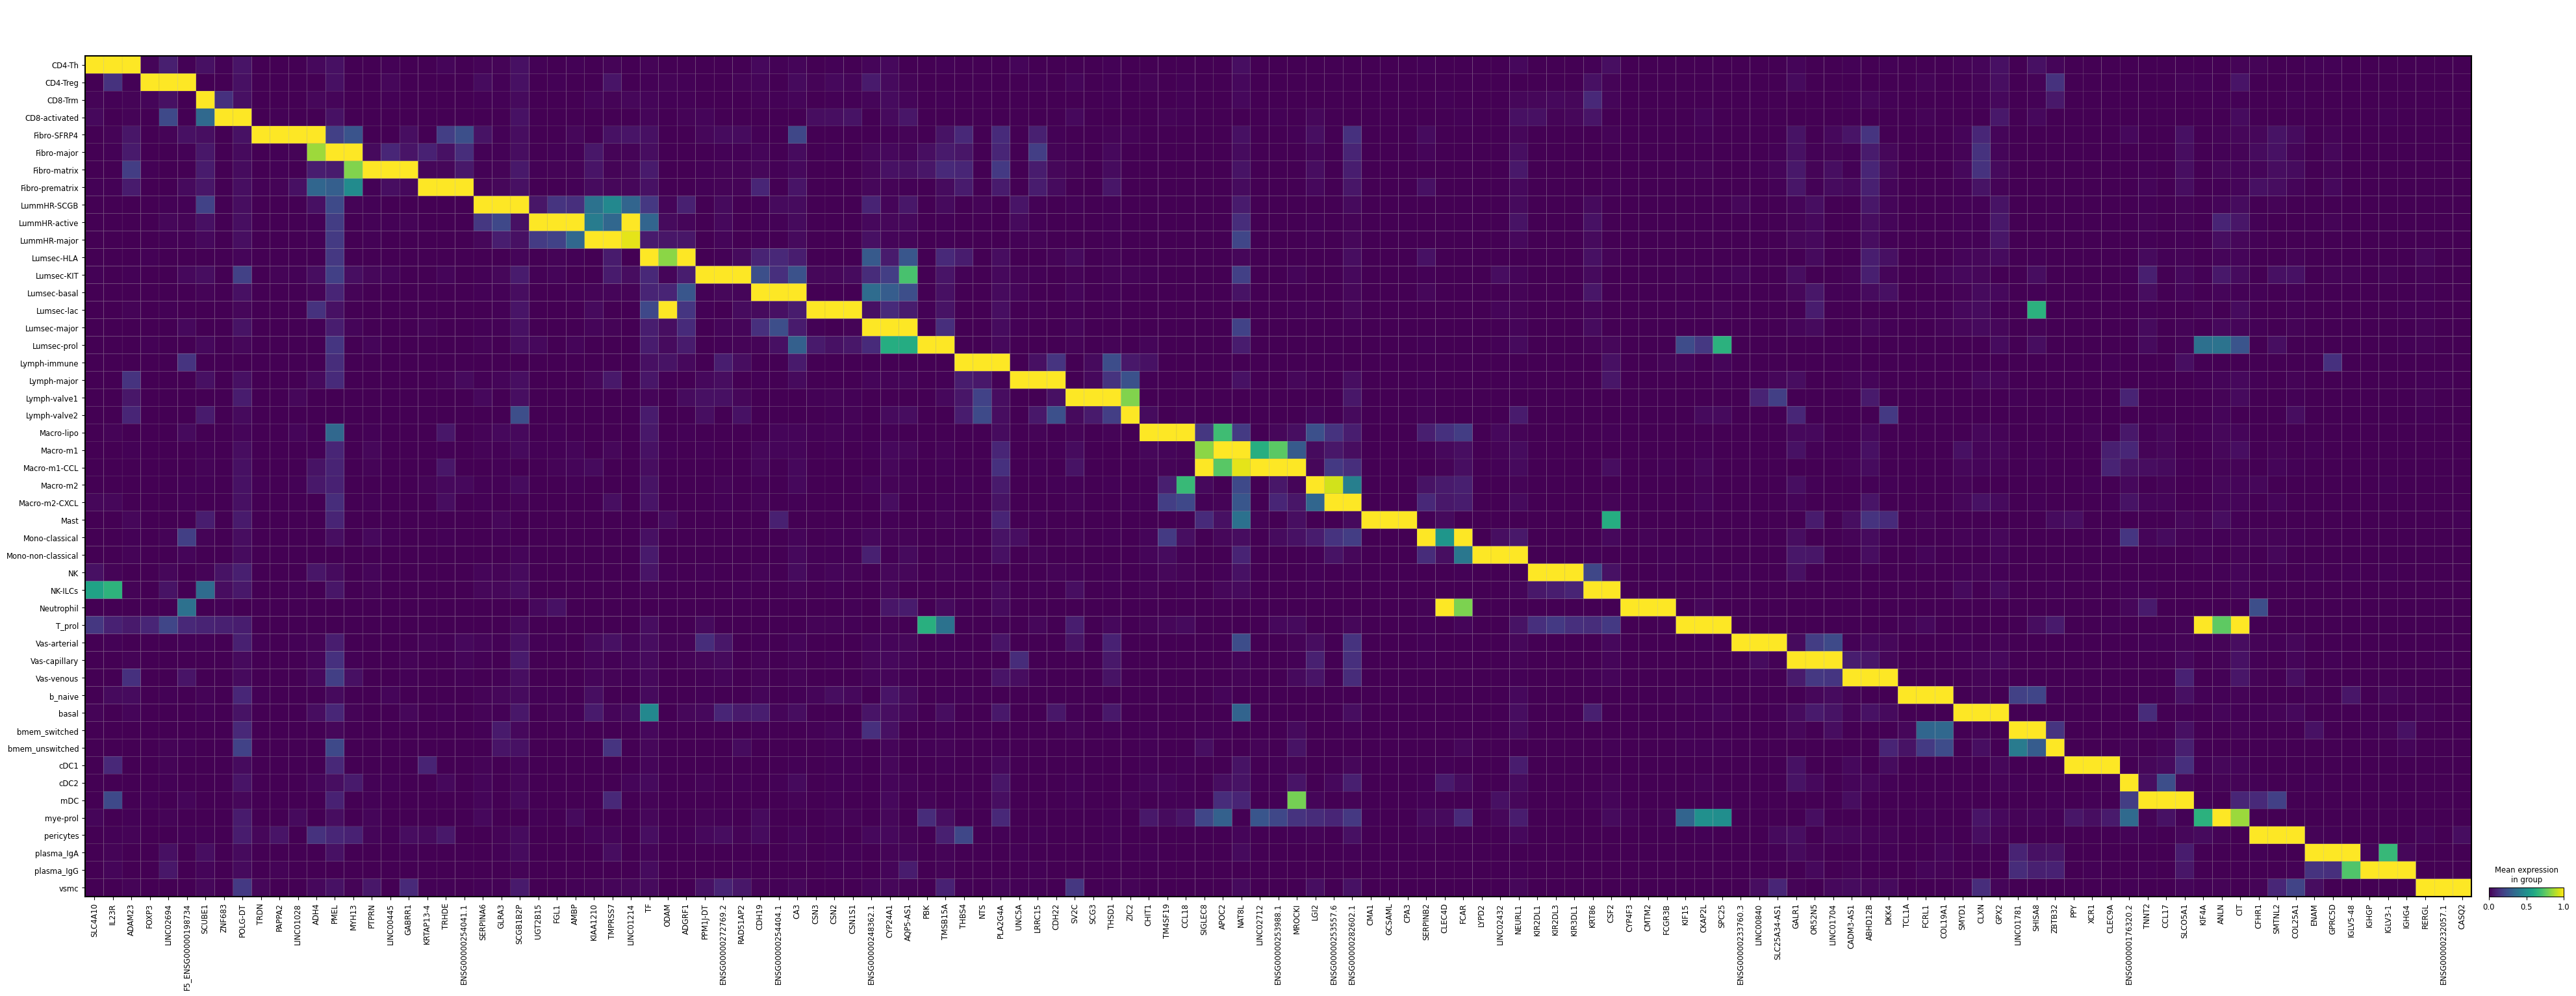

In [16]:
# Show top three markers for each cell type passing cutoff, only display cell types with markers
scherlock.plot_marker_heatmap(n_genes=3, column_ctype=cell_type_column, cutoff=0.3,remove_ctype_no_marker=True)

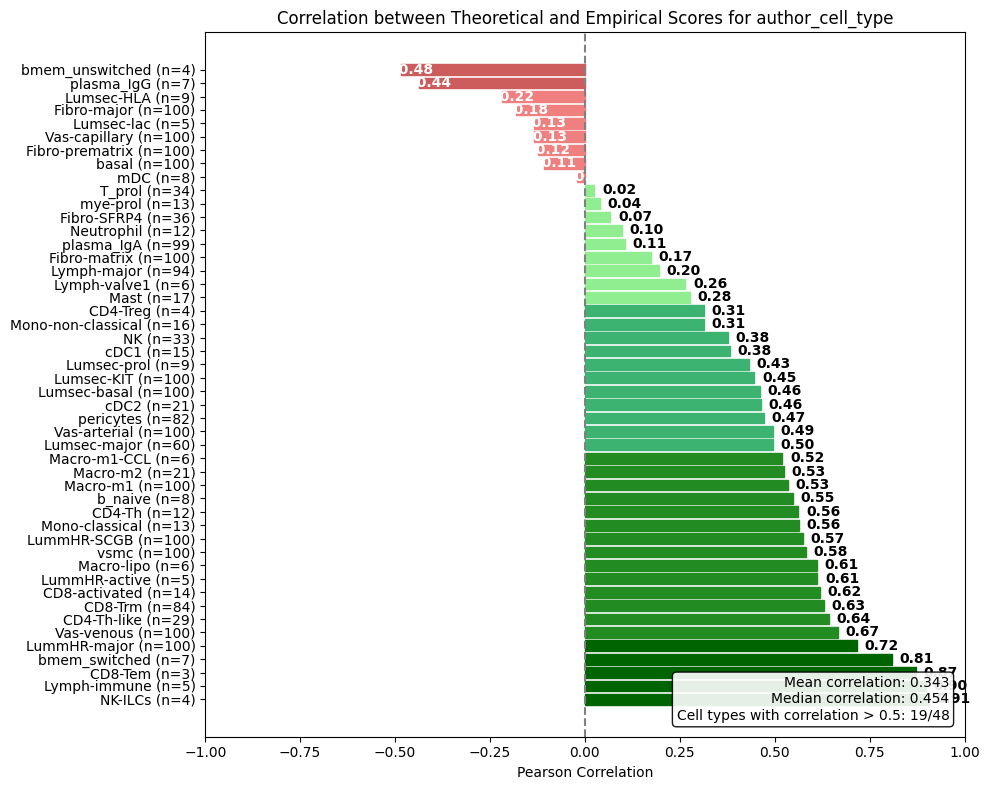

In [ ]:
# Visualize the correlation between the empirical and theoretical distributions
fig = scherlock.plot_corr_theoric_empiric(min_genes=3, column_ctype="author_cell_type")

## Exporting results 

In [ ]:
# get top markers for each cell type
scherlock.get_marker(column_ctype='author_cell_type')

,cell_type,marker_gene,score,method,expression_proportion
19,CD4-Th,SLC4A10,0.477164,empiric,4.466280e-05
18,CD4-Th-like,ENSG00000249806.1,0.220114,empiric,6.291990e-06
20,CD4-Treg,FOXP3,0.673118,empiric,1.829449e-04
17,CD4-naive,ARMH1,0.142541,empiric,3.864055e-05
16,CD8-Tem,ZNF80,0.249563,empiric,2.285995e-05
21,CD8-Trm,SCUBE1,0.429457,empiric,2.423227e-05
24,CD8-activated,ZNF683,0.415790,empiric,1.692424e-04
41,Fibro-SFRP4,TRDN,0.926611,empiric,5.728781e-05
39,Fibro-major,ADH4,0.560994,empiric,1.865052e-06
40,Fibro-matrix,PTPRN,0.981439,empiric,1.544483e-05


In [ ]:
# get top 3 markers for each cell type
scherlock.get_marker(column_ctype='author_cell_type', n_top_genes=3)

,cell_type,marker_gene,score,method,expression_proportion
54,CD4-Th,IL23R,0.391669,empiric,0.000022
53,CD4-Th,SLC4A10,0.477164,empiric,0.000045
55,CD4-Th,ADAM23,0.375697,empiric,0.000068
50,CD4-Th-like,ENSG00000249806.1,0.220114,empiric,0.000006
52,CD4-Th-like,NLRP6,0.174956,empiric,0.000004
...,...,...,...,...,...
37,plasma_IgG,IGLV3-1,0.509885,empiric,0.000210
36,plasma_IgG,IGHGP,0.849616,empiric,0.000498
142,vsmc,RERGL,1.000000,empiric,0.000434
143,vsmc,ENSG00000232057.1,1.000000,empiric,0.000009


In [ ]:
# Get top 3 markers for each cell type with a score > 0.5
scherlock.get_marker(column_ctype='author_cell_type', n_top_genes=3, min_score=0.5)

,cell_type,marker_gene,score,method,expression_proportion
26,CD4-Treg,FOXP3,0.673118,empiric,0.000183
47,Fibro-SFRP4,TRDN,0.926611,empiric,0.000057
48,Fibro-SFRP4,PAPPA2,0.887815,empiric,0.000088
49,Fibro-SFRP4,LINC01028,0.884248,empiric,0.000010
42,Fibro-major,ADH4,0.560994,empiric,0.000002
...,...,...,...,...,...
21,plasma_IgG,IGLV3-1,0.509885,empiric,0.000210
22,plasma_IgG,IGHG4,0.502570,empiric,0.002296
65,vsmc,RERGL,1.000000,empiric,0.000434
66,vsmc,ENSG00000232057.1,1.000000,empiric,0.000009
